In [61]:
import polars as pl
import plotly.express as px
import matplotlib.pyplot as plt


In [17]:
# Load the data into a Pandas DataFrame
df = pl.read_csv('../rtf/joined_data.csv')
print(df.shape)

(58348, 18)


In [50]:
# Group the data by Seller and count the number of transactions
seller_counts = df.groupby("Seller", maintain_order=True).agg(pl.count())
seller_sorted_top10 = seller_counts.sort("count", descending=True).head(10)

# Calculate the count for the "other" category
other_count = seller_counts.sum()["count"][0] - seller_sorted_top10 .sum()["count"][0]
others_df = pl.DataFrame({"Seller": "other countries", "count": other_count})
others_df = others_df.with_columns([pl.col("count").cast(pl.Int64, strict=False)])
seller_sorted_top10 = seller_sorted_top10.with_columns([pl.col("count").cast(pl.Int64, strict=False)])
new_df = pl.concat([seller_sorted_top10, others_df], rechunk=True)


# Create a polar pie chart of the top sellers
px.pie(new_df,
       names = new_df.select('Seller').to_series(),
       values = new_df.select("count").to_series(),
       color_discrete_sequence = px.colors.sequential.Plasma_r,
       title="Top 10 and other seller in 1950-2021")



In [57]:
# Group the data by Seller and count the number of transactions
Buyer_counts = df.groupby("Buyer", maintain_order=True).agg(pl.count())
Buyer_sorted_top10 = Buyer_counts.sort("count", descending=True).head(20)

# Calculate the count for the "other" category
other_count = Buyer_counts.sum()["count"][0] - Buyer_sorted_top10.sum()["count"][0]
others_df = pl.DataFrame({'Buyer': "other countries", "count": other_count})
others_df = others_df.with_columns([pl.col("count").cast(pl.Int64, strict=False)])
Buyer_sorted_top10 = Buyer_sorted_top10.with_columns([pl.col("count").cast(pl.Int64, strict=False)])
new_df = pl.concat([Buyer_sorted_top10, others_df], rechunk=True)

# Create a polar pie chart of the top sellers
px.pie(df,
       names = Buyer_sorted_top10.select('Buyer').to_series(),
       values = Buyer_sorted_top10.select("count").to_series(),
       color_discrete_sequence=px.colors.sequential.Viridis,
       title="top 20 buyers")


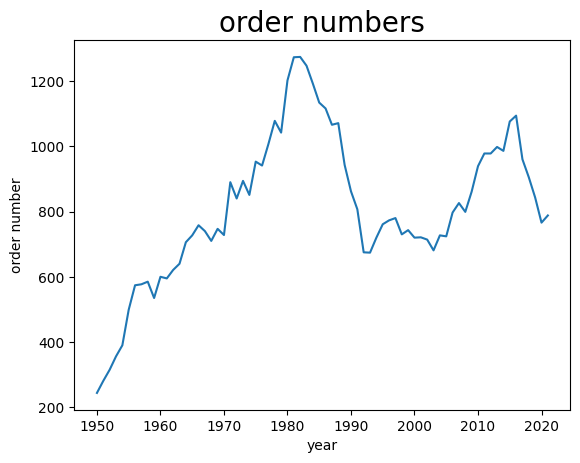

In [62]:
# calculate the order counts for each year
order_counts = df.groupby("Delivery year", maintain_order=True).agg(pl.count())
fig, ax = plt.subplots()


plt.plot(order_counts["Delivery year"], order_counts["count"])
plt.title(r'order numbers', fontsize=20)
plt.xlabel('year')
plt.ylabel('order number')
plt.show()
